In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [33]:
df=pd.read_csv('lifePlane.csv', sep=',', encoding='unicode_escape')
df['Event_Date']=pd.to_datetime(df['Event_Date'])
df['Intro']=pd.to_datetime(df['Intro'])
df['Outro']=pd.to_datetime(df['Outro'])
df['AñosFuncionamiento']=pd.DatetimeIndex(df['Outro']).year-pd.DatetimeIndex(df['Intro']).year
df['year'] = pd.DatetimeIndex(df['Event_Date']).year
df['month'] = pd.DatetimeIndex(df['Event_Date']).month
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
cat_val_vars = [var for var in df.columns if df[var].dtype != 'O']
print(cat_vars)
print(cat_val_vars)
df.head()

['Model', 'Investigation_Type', 'Location', 'Country', 'Aircraft_Damage', 'Make', 'Is_Operational']
['Event_Date', 'Fatal_Injuries', 'Intro', 'Outro', 'Operational_Count', 'AñosFuncionamiento', 'year', 'month']


,Model,Investigation_Type,Event_Date,Location,Country,Aircraft_Damage,Make,Fatal_Injuries,Intro,Outro,Operational_Count,Is_Operational,AñosFuncionamiento,year,month
0,CRJ-200,Accident,2000-09-17,"""ATLANTA, GA""",United States,None Reported,Bombardier,0,1992-01-01,2007-01-01,1054,No,15,2000,9
1,CL-600,Accident,2007-12-16,"""Providence, RI""",United States,Substantial,Bombardier,0,1978-01-01,2017-09-21,678,Yes,39,2007,12
2,CL-600,Incident,2008-12-14,"""Philadelphia, PA""",United States,Minor,Bombardier,0,1978-01-01,2017-09-21,678,Yes,39,2008,12
3,CL-600,Accident,2009-12-18,"""Dallas, TX""",United States,Substantial,Bombardier,0,1978-01-01,2017-09-21,678,Yes,39,2009,12
4,CL-600,Incident,2011-10-23,"""Atlanta, GA""",United States,None Reported,Bombardier,0,1978-01-01,2017-09-21,678,Yes,39,2011,10


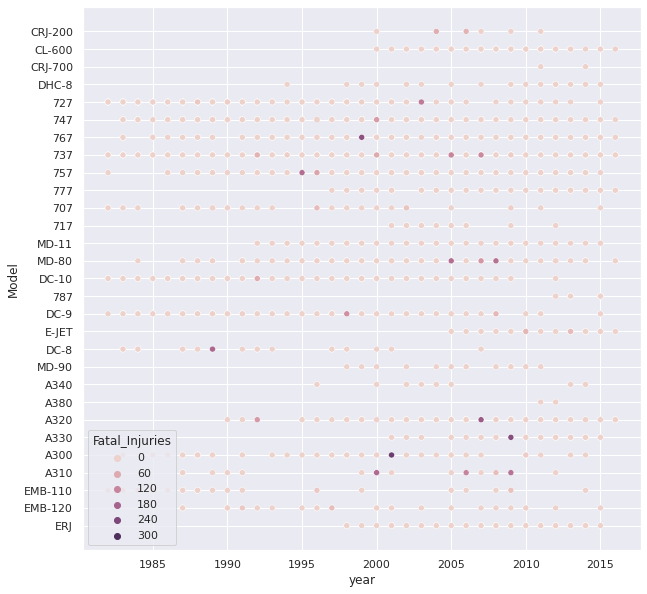

In [34]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="year", y="Model", hue="Fatal_Injuries")
# sns.scatterplot(
#     data=df, x="year", y="Model", hue="Investigation_Type", size="Investigation_Type",
#     sizes=(20, 200), legend="full"
# )

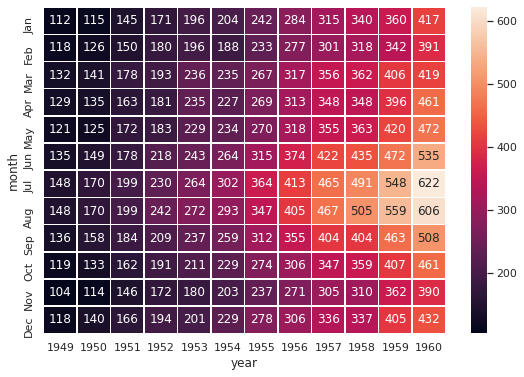

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [36]:
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



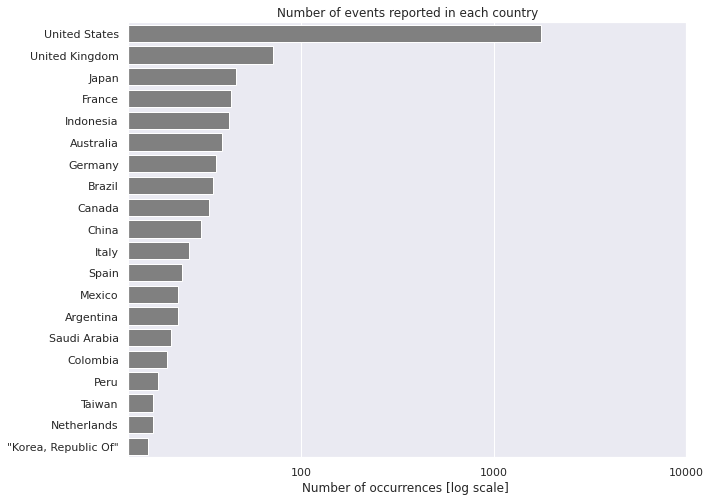

In [59]:
'''
sns.relplot(
    data=df,
    x="Investigation_Type", y="Operational_Count", 
    hue="Aircraft_Damage", style="Aircraft_Damage", 
)
'''
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['font.size'] = 19
column = 'Country'
graph =  df.groupby(column)['Model'].count().sort_values(ascending=False).head(20)
fig = sns.barplot(graph.values, graph.index, color='0.5');
fig.set_xscale('log')
fig.set(xlabel = 'Number of occurrences [log scale] ', ylabel = '', Title='Number of events reported in each country');
fig.set_xticks([100,1000,10000]);
fig.set_xticklabels([100,1000,10000]);

In [38]:
df.columns

Index(['Model', 'Investigation_Type', 'Event_Date', 'Location', 'Country',
       'Aircraft_Damage', 'Make', 'Fatal_Injuries', 'Intro', 'Outro',
       'Operational_Count', 'Is_Operational', 'AñosFuncionamiento', 'year',
       'month'],
      dtype='object')

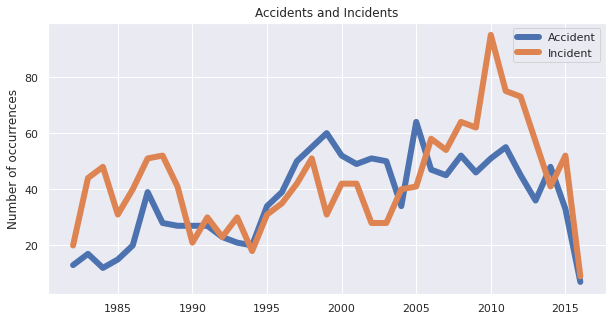

In [39]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
column = 'year'
sub_occ1 = df[df['Investigation_Type']=='Accident']
sub_occ2 = df[df['Investigation_Type']=='Incident']

data = sub_occ1.dropna(subset=[column])
data2 = data.groupby(column)['Investigation_Type'].count()

data3 = sub_occ2.dropna(subset=[column])
data4 = data3.groupby(column)['Investigation_Type'].count()

plt.plot(data2.index, data2.values, label='Accident',linewidth=6);
plt.plot(data4.index, data4.values, label = 'Incident',linewidth=6);

plt.ylabel('Number of occurrences');
plt.title('Accidents and Incidents');
plt.legend();

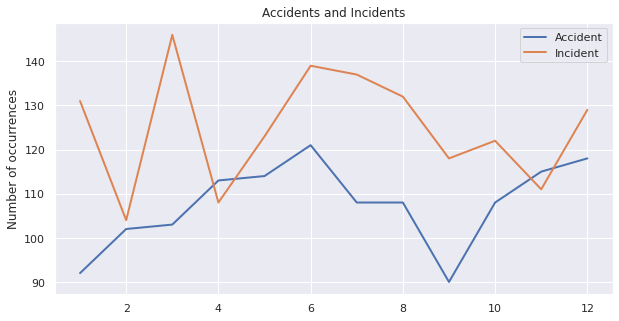

In [40]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
column = 'month'
sub_occ1 = df[df['Investigation_Type']=='Accident']
sub_occ2 = df[df['Investigation_Type']=='Incident']

data = sub_occ1.dropna(subset=[column])
data2 = data.groupby(column)['Investigation_Type'].count()

data3 = sub_occ2.dropna(subset=[column])
data4 = data3.groupby(column)['Investigation_Type'].count()

plt.plot(data2.index, data2.values, label='Accident',linewidth=2);
plt.plot(data4.index, data4.values, label = 'Incident',linewidth=2);

plt.ylabel('Number of occurrences');
plt.title('Accidents and Incidents');
plt.legend();

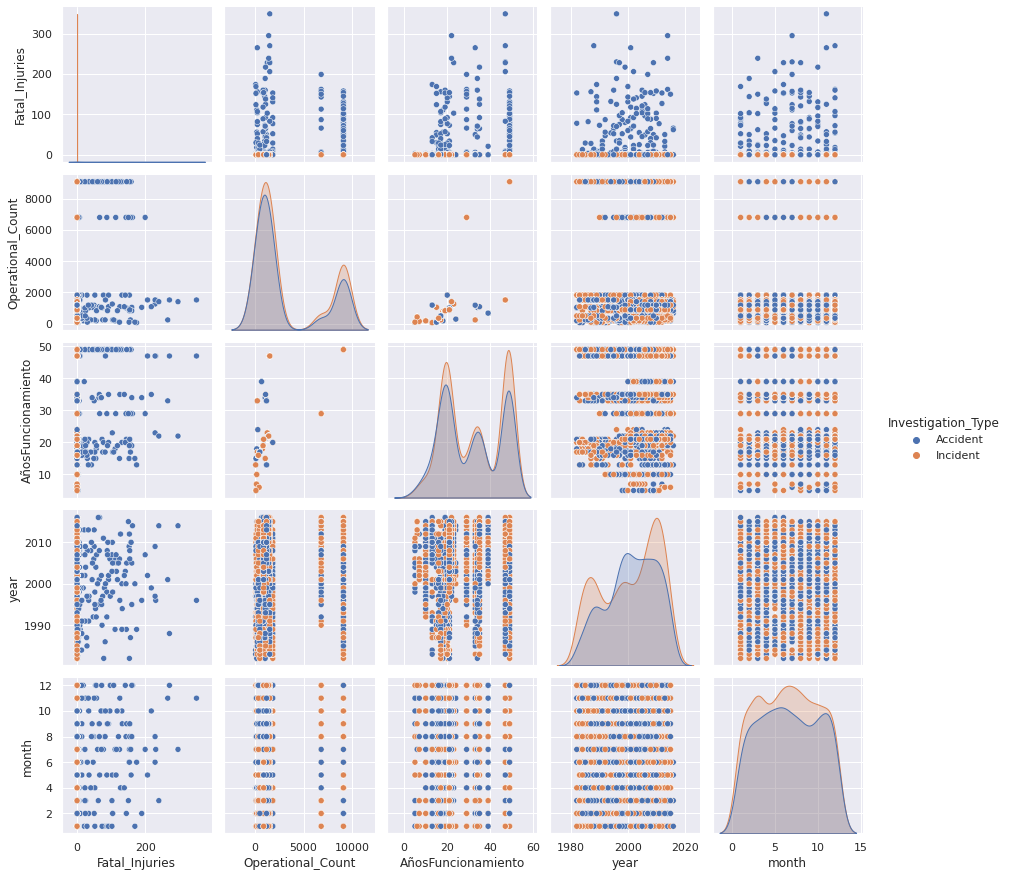

In [41]:
sns.pairplot(data=df, hue="Investigation_Type")

In [42]:
df.columns

Index(['Model', 'Investigation_Type', 'Event_Date', 'Location', 'Country',
       'Aircraft_Damage', 'Make', 'Fatal_Injuries', 'Intro', 'Outro',
       'Operational_Count', 'Is_Operational', 'AñosFuncionamiento', 'year',
       'month'],
      dtype='object')

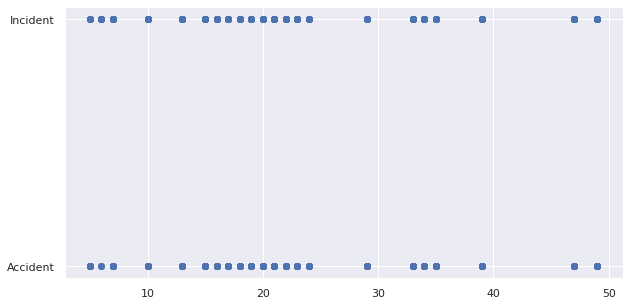

In [49]:
matplotlib.pyplot.scatter( df['AñosFuncionamiento'],df['Investigation_Type'])

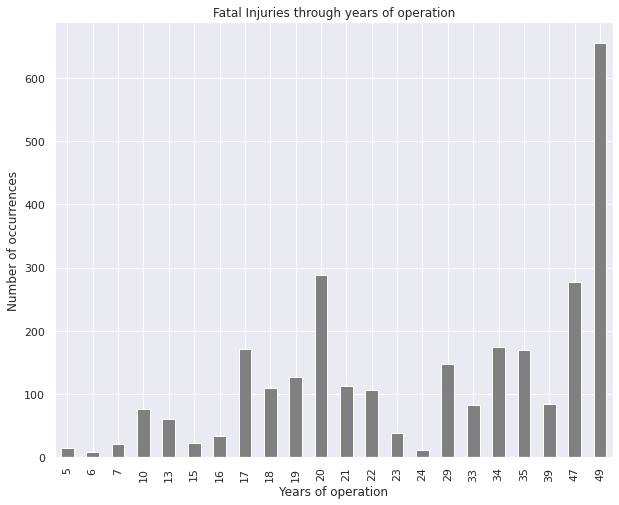

In [60]:
ValAñosFunc = df.groupby('AñosFuncionamiento')['Fatal_Injuries'].count()
ValAñosFunc.plot.bar(color='0.5')
plt.ylabel('Number of occurrences');
plt.xlabel('Years of operation');
plt.title('Fatal Injuries through years of operation');

plt.show()

In [78]:
a=ValAñosFunc.to_frame().reset_index()
a

,Make,Aircraft_Damage,Operational_Count
0,Airbus,Destroyed,22
1,Airbus,Minor,84
2,Airbus,None Reported,138
3,Airbus,Substantial,28
4,Boeing,Destroyed,108
5,Boeing,Minor,558
6,Boeing,None Reported,759
7,Boeing,Substantial,312
8,Bombardier,Destroyed,6
9,Bombardier,Minor,29


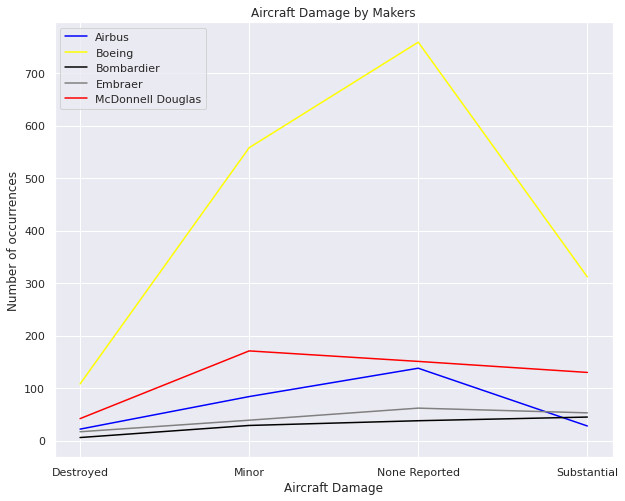

In [97]:
#import matplotlib.pyplot as plt
Unicos=a.Make.unique()
Color= ['blue', 'yellow', 'black', 'gray','red']
n=0
for i in Unicos:
  NewDF=a.loc[a['Make'] == i]
  plt.plot(NewDF['Aircraft_Damage'],NewDF['Operational_Count'], label=i, color=Color[n])
  n+=1
plt.ylabel('Number of occurrences');
plt.xlabel('Aircraft Damage');
plt.title('Aircraft Damage by Makers');
plt.legend()
plt.show()


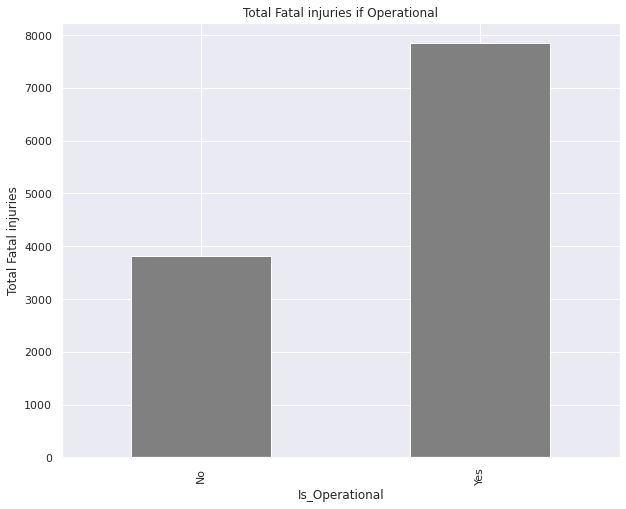

In [105]:
ValAñosFunc = df.groupby('Is_Operational')['Fatal_Injuries'].sum()
ValAñosFunc.plot.bar(color='0.5')
plt.ylabel('Total Fatal injuries');
plt.xlabel('Is_Operational');
plt.title('Total Fatal injuries if Operational');

plt.show()

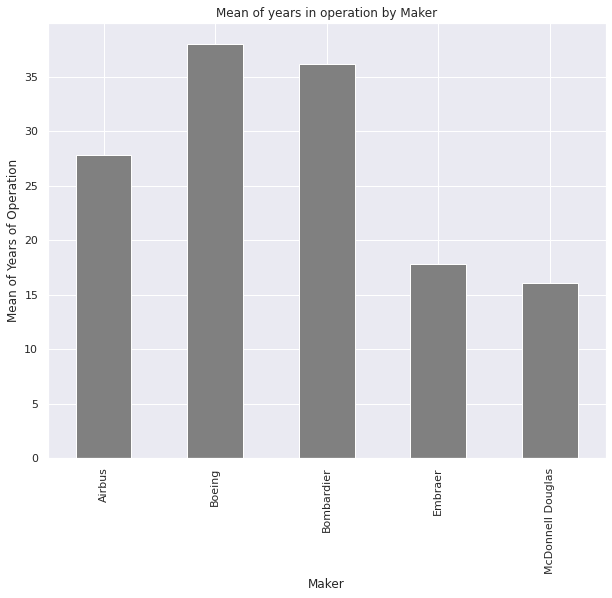

In [104]:
ValAñosFunc = df.groupby('Make')['AñosFuncionamiento'].mean()
ValAñosFunc.plot.bar(color='0.5')
plt.ylabel('Mean of Years of Operation');
plt.xlabel('Maker');
plt.title('Mean of years in operation by Maker');

plt.show()

In [98]:
df.columns

Index(['Model', 'Investigation_Type', 'Event_Date', 'Location', 'Country',
       'Aircraft_Damage', 'Make', 'Fatal_Injuries', 'Intro', 'Outro',
       'Operational_Count', 'Is_Operational', 'AñosFuncionamiento', 'year',
       'month'],
      dtype='object')